In [3]:
import numpy as np
import pandas as pd
# Thiết lập tham số cho số lượng sinh viên
num_students = 1000
# Sinh điểm cho từng thành phần với số thực có 2 chữ số thập phân
np.random.seed(42) # Để kết quả ngẫu nhiên có thể lặp lại
attendance_scores = np.round(np.random.uniform(0, 10, num_students), 2) # Điểm␣chuyên cần từ 0 đến 10
project_scores = np.round(np.random.uniform(0, 10, num_students), 2) # Điểm␣ bài tập lớn từ 0 đến 10
midterm_scores = np.round(np.random.uniform(0, 10, num_students), 2) # Điểm␣giữa kỳ từ 0 đến 10
final_scores = np.round(np.random.uniform(0, 10, num_students), 2) # Điểm␣ cuối kỳ từ 0 đến 10
# Tính điểm tổng kết với số thực có 2 chữ số thập phân
final_grades = np.round(
attendance_scores * 0.1 +
project_scores * 0.1 +
midterm_scores * 0.2 +
final_scores * 0.6, 2
)
# Chuyển đổi điểm tổng kết sang điểm chữ
def calculate_letter_grade(grade):
    if grade < 4:
        return 'F'
    elif grade < 5:
        return 'D'
    elif grade < 5.5:
        return 'D+'
    elif grade < 6.5:
        return 'C'
    elif grade < 7:
        return 'C+'
    elif grade < 8:
        return 'B'
    elif grade < 8.5:
        return 'B+'
    elif grade < 9:
        return 'A'
    else:
        return 'A+'
# Áp dụng hàm tính điểm chữ vào cột LetterGrade
letter_grades = [calculate_letter_grade(grade) for grade in final_grades]
# Tạo DataFrame với các cột điểm và điểm chữ
student_data = pd.DataFrame({
'Attendance': attendance_scores,
'Project': project_scores,
'Midterm': midterm_scores,
'FinalExam': final_scores,
'FinalGrade': final_grades,
'LetterGrade': letter_grades
})
# Lưu dữ liệu ra file CSV (tùy chọn)
student_data.to_csv('student_scores.csv', index=False)
# Hiển thị một phần dữ liệu
print(student_data.head())

   Attendance  Project  Midterm  FinalExam  FinalGrade LetterGrade
0        3.75     1.85     2.62       6.73        5.12          D+
1        9.51     5.42     2.47       7.97        6.77          C+
2        7.32     8.73     9.06       2.50        4.92           D
3        5.99     7.32     2.50       6.25        5.58           C
4        1.56     8.07     2.72       5.72        4.94           D


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Đọc dữ liệu từ file CSV
data = pd.read_csv('student_scores.csv')
# Chọn các cột đầu điểm (Attendance, Project, Midterm) làm đặc trưng và␣ FinalExam làm nhãn
X = data[['Attendance', 'Project', 'Midterm']].values
y = data['FinalExam'].values
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, Flatten, Reshape
# Mô hình CNN
cnn_model = Sequential([
Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
Conv1D(64, kernel_size=2, activation='relu'),
Dropout(0.3),
Conv1D(64, kernel_size=2, activation='relu'),
Flatten(),
Dense(100, activation='relu'),
Dropout(0.5),
Dense(1, activation='linear') # Sử dụng 'linear' cho dự đoán hồi quy
])
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Ví dụ với CNN model
history_cnn = cnn_model.fit(X_train, y_train, epochs=20, batch_size=32,validation_data=(X_test, y_test))

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 30.5955 - mae: 4.7258 - val_loss: 18.6468 - val_mae: 3.5338
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.0017 - mae: 3.1669 - val_loss: 9.4112 - val_mae: 2.5558
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 11.0771 - mae: 2.8371 - val_loss: 8.9705 - val_mae: 2.5142
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 9.9337 - mae: 2.6796 - val_loss: 9.1360 - val_mae: 2.5279
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 10.0788 - mae: 2.6889 - val_loss: 8.8876 - val_mae: 2.5116
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.6695 - mae: 2.6507 - val_loss: 8.7473 - val_mae: 2.4883
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.6670 - mae: 2.6208 - val_loss: 8.9520 - val_mae: 2.5166
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.4662 - mae: 2.5922 - val_loss: 8.5194 - val_mae: 2.4809
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 

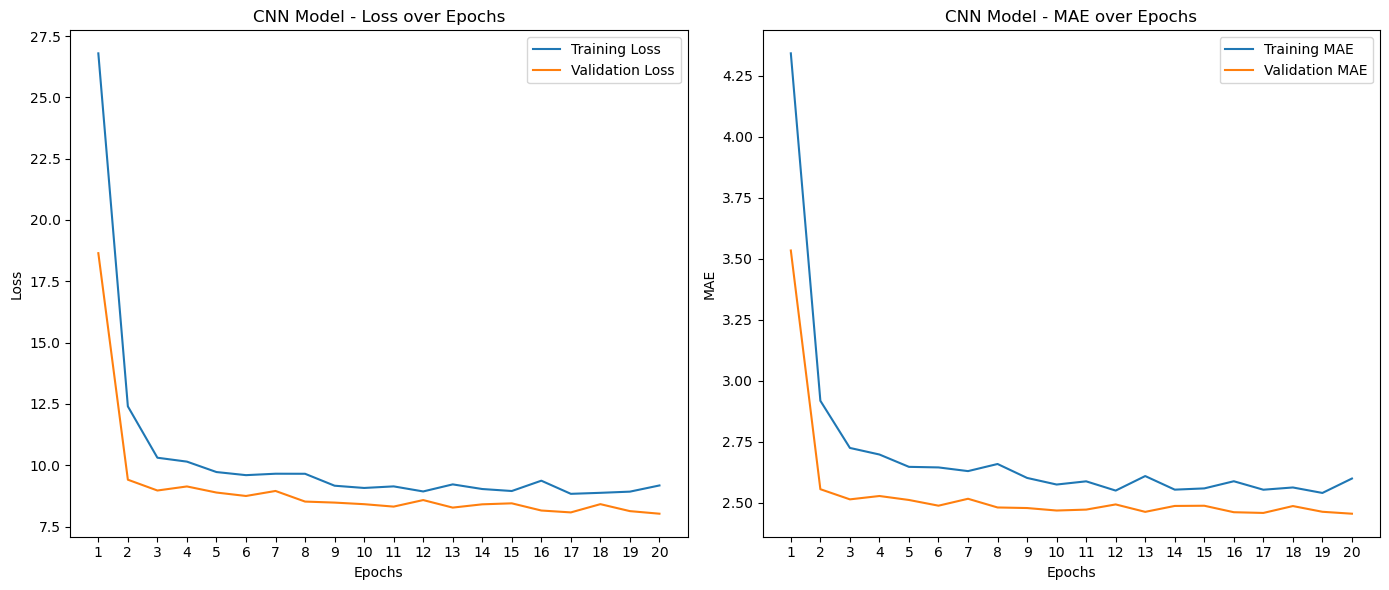

In [8]:
import matplotlib.pyplot as plt
# Hàm vẽ đồ thị loss và MAE với đầy đủ các epoch trên trục Ox
def plot_training_history(history, model_name):
    epochs = range(1, len(history.history['loss']) + 1)
    # Vẽ loss
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(epochs) # Hiển thị đầy đủ các epoch trên trục Ox
    plt.legend()
    # Vẽ MAE (Mean Absolute Error) làm độ chính xác cho bài toán hồi quy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['mae'], label='Training MAE')
    plt.plot(epochs, history.history['val_mae'], label='Validation MAE')
    plt.title(f'{model_name} - MAE over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.xticks(epochs) # Hiển thị đầy đủ các epoch trên trục Ox
    plt.legend()
    plt.tight_layout()
    plt.show()
# Vẽ đồ thị cho CNN model
plot_training_history(history_cnn, 'CNN Model')

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 28.3962 - mae: 4.5074 - val_loss: 10.6362 - val_mae: 2.7151
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.3816 - mae: 2.9481 - val_loss: 10.0331 - val_mae: 2.6449
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.6939 - mae: 2.7712 - val_loss: 9.3085 - val_mae: 2.5687
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.4572 - mae: 2.7326 - val_loss: 8.7879 - val_mae: 2.5119
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5465 - mae: 2.6230 - val_loss: 8.7568 - val_mae: 2.4993
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2069 - mae: 2.6219 - val_loss: 8.1750 - val_mae: 2.4411
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6174 - mae: 2.6327 - val_loss: 9.3199 - val_mae: 2.5612
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.7375 - mae: 2.5196 - val_loss: 8.7246 - val_mae: 2.5039
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0419

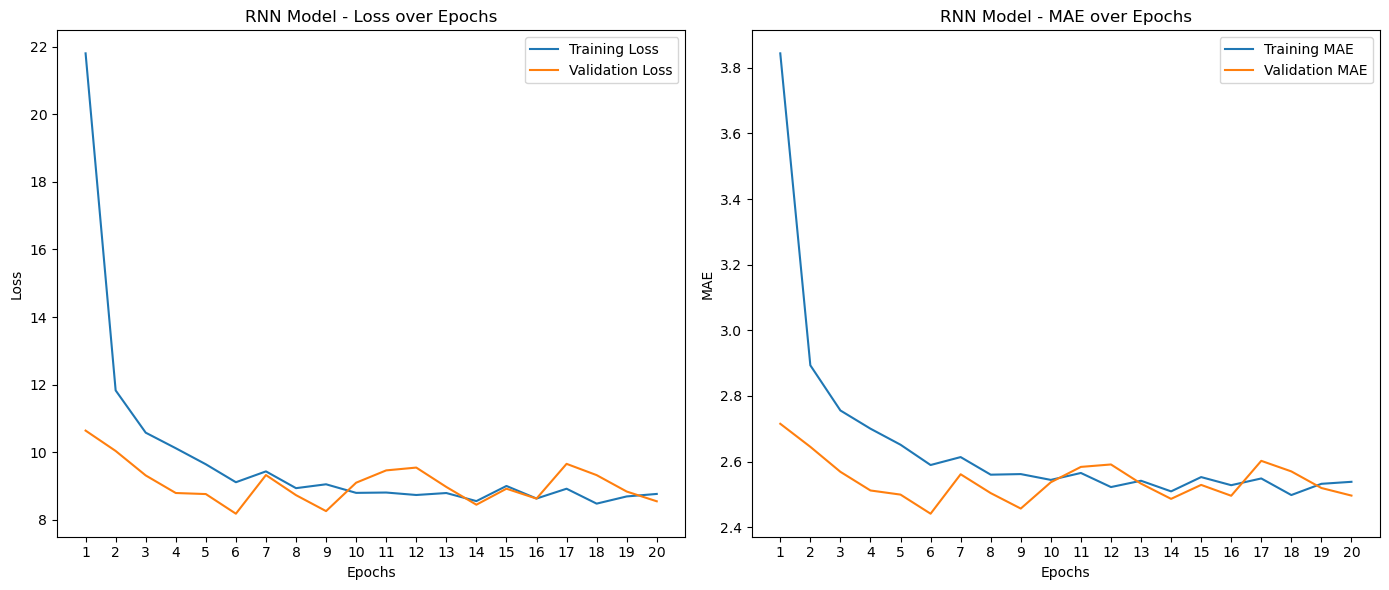

In [10]:
from keras.layers import SimpleRNN, Dropout, Dense, Reshape
from keras.models import Sequential

# Mô hình RNN
rnn_model = Sequential([
    Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    SimpleRNN(100, return_sequences=True, activation='relu'),
    Dropout(0.3),
    SimpleRNN(50, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dense(1, activation='linear')
])

rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Huấn luyện mô hình
history_rnn = rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Vẽ đồ thị cho RNN model
plot_training_history(history_rnn, 'RNN Model')


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 31.8906 - mae: 4.8948 - val_loss: 28.6530 - val_mae: 4.5644
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.8160 - mae: 3.9422 - val_loss: 9.4265 - val_mae: 2.5894
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9419 - mae: 2.6454 - val_loss: 8.1087 - val_mae: 2.4690
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.7196 - mae: 2.5409 - val_loss: 8.2622 - val_mae: 2.4783
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0994 - mae: 2.6010 - val_loss: 8.2441 - val_mae: 2.4757
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.1896 - mae: 2.6152 - val_loss: 8.3381 - val_mae: 2.4753
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0049 - mae: 2.5758 - val_loss: 8.0933 - val_mae: 2.4762
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.8827 - mae: 2.5863 - val_loss: 8.0805 - val_mae: 2.4669
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.6480 -

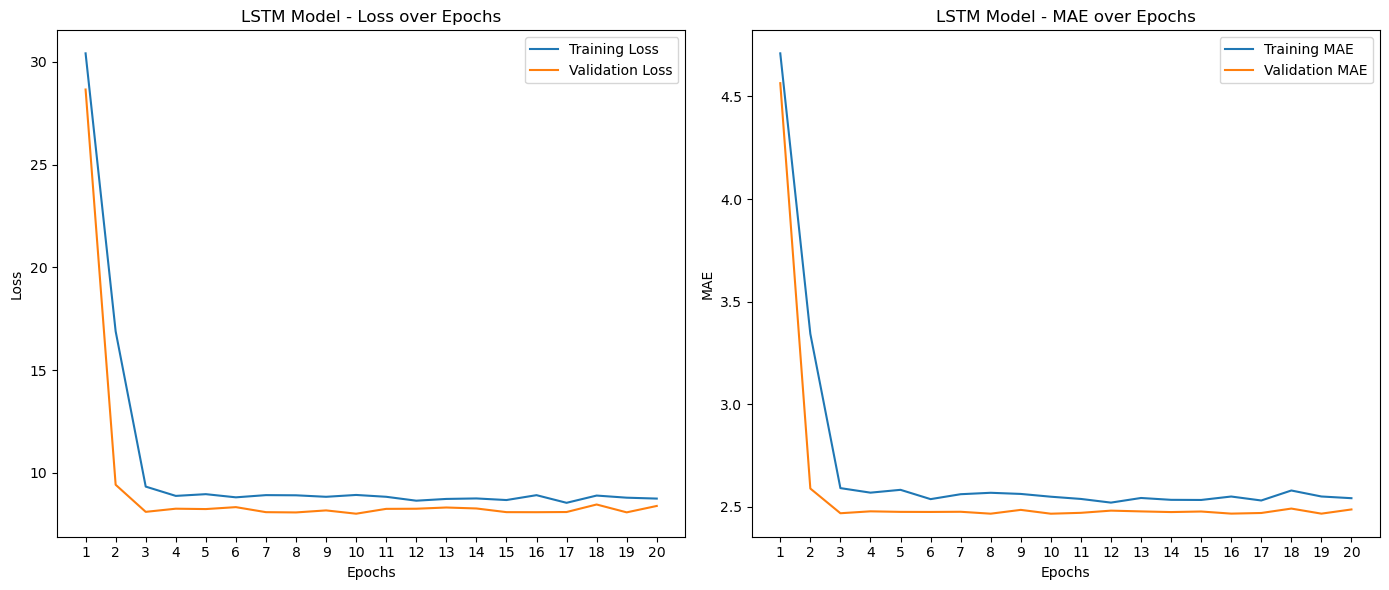

In [17]:
from keras.layers import LSTM, Dropout, Dense, Reshape
from keras.models import Sequential

# Mô hình LSTM
lstm_model = Sequential([
    Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    LSTM(100, return_sequences=True),
    Dropout(0.3),
    LSTM(50),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dense(1, activation='linear')
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Huấn luyện mô hình LSTM
history_lstm = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Vẽ đồ thị cho LSTM model
plot_training_history(history_lstm, 'LSTM Model')


Epoch 1/20


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 25.1128 - mae: 4.1318 - val_loss: 11.9371 - val_mae: 2.8246
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.8599 - mae: 2.7112 - val_loss: 11.8174 - val_mae: 2.8115
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.5360 - mae: 2.6914 - val_loss: 10.3941 - val_mae: 2.6631
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.2854 - mae: 2.7444 - val_loss: 10.3200 - val_mae: 2.6676
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.7232 - mae: 2.6702 - val_loss: 10.2090 - val_mae: 2.6529
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.2318 - mae: 2.7200 - val_loss: 9.3704 - val_mae: 2.5633
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.2594 - mae: 2.5667 - val_loss: 9.5032 - val_mae: 2.5777
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8874 - mae: 2.6977 - val_loss: 8.8267 - val_mae: 2.5170
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3896 - mae: 

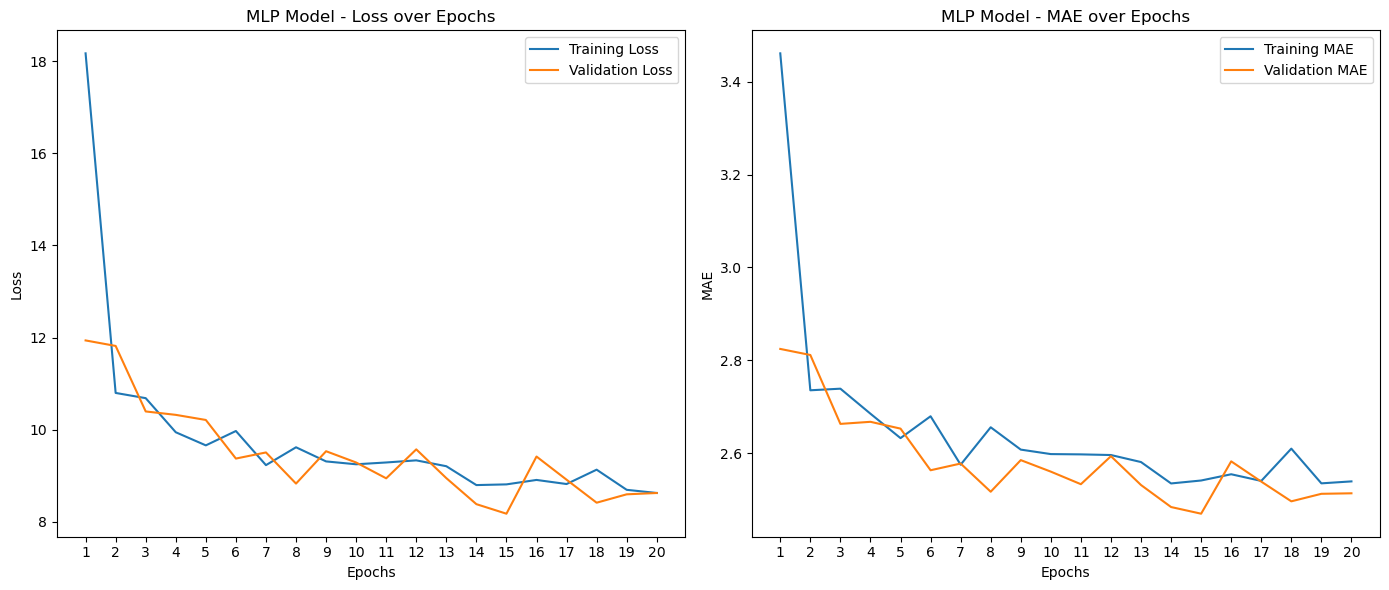

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Mô hình MLP đơn giản với 7 lớp
mlp_model = Sequential([
Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
Dropout(0.3),
Dense(128, activation='relu'),
Dropout(0.3),
Dense(128, activation='relu'),
Dropout(0.3),
Dense(128, activation='relu'),
Dropout(0.3),
Dense(128, activation='relu'),
Dropout(0.3),
Dense(100, activation='relu'), # Lớp thứ 6 với ít nhất 100 neuron
Dropout(0.3),
Dense(1, activation='linear') # Lớp đầu ra dự đoán giá trị liên tục
])
# Biên dịch mô hình
mlp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Huấn luyện mô hình
history_mlp = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32,validation_data=(X_test, y_test))
plot_training_history(history_mlp, 'MLP Model')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


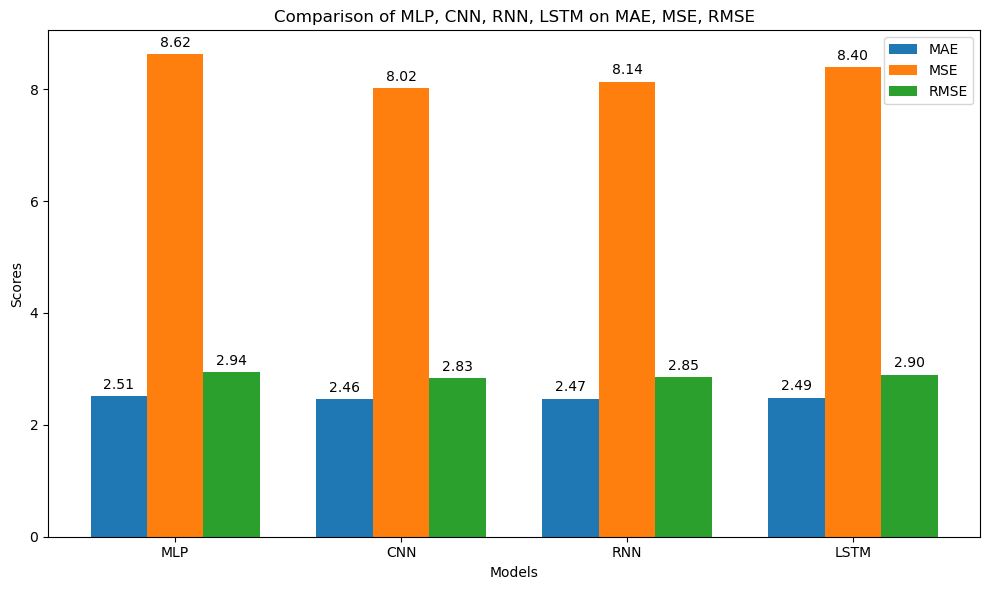

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Dự đoán trên tập kiểm tra cho từng mô hình
y_pred_mlp = mlp_model.predict(X_test)
y_pred_cnn = cnn_model.predict(X_test)
y_pred_rnn = rnn_model.predict(X_test)
y_pred_lstm = lstm_model.predict(X_test)

# Tính các chỉ số MAE, MSE và RMSE cho mỗi mô hình
metrics = {
    'MLP': {
        'MAE': mean_absolute_error(y_test, y_pred_mlp),
        'MSE': mean_squared_error(y_test, y_pred_mlp),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_mlp))
    },
    'CNN': {
        'MAE': mean_absolute_error(y_test, y_pred_cnn),
        'MSE': mean_squared_error(y_test, y_pred_cnn),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_cnn))
    },
    'RNN': {
        'MAE': mean_absolute_error(y_test, y_pred_rnn),
        'MSE': mean_squared_error(y_test, y_pred_rnn),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rnn))
    },
    'LSTM': {
        'MAE': mean_absolute_error(y_test, y_pred_lstm),
        'MSE': mean_squared_error(y_test, y_pred_lstm),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lstm))
    }
}

# Chuyển các giá trị vào dạng dễ vẽ
models = list(metrics.keys())
mae_values = [metrics[model].get('MAE', 0) for model in models]
mse_values = [metrics[model].get('MSE', 0) for model in models]
rmse_values = [metrics[model].get('RMSE', 0) for model in models]

# Vẽ đồ thị dạng cột
x = np.arange(len(models))  # Vị trí cho các cột của từng mô hình
width = 0.25  # Độ rộng của mỗi cột
fig, ax = plt.subplots(figsize=(10, 6))

# Các cột cho MAE, MSE, RMSE
bars1 = ax.bar(x - width, mae_values, width, label='MAE')
bars2 = ax.bar(x, mse_values, width, label='MSE')
bars3 = ax.bar(x + width, rmse_values, width, label='RMSE')

# Hiển thị giá trị trên đỉnh của từng cột với 2 chữ số sau dấu phẩy
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Giá trị có 2 chữ số thập phân
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Khoảng cách từ đỉnh cột
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Cài đặt trục và tiêu đề
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MLP, CNN, RNN, LSTM on MAE, MSE, RMSE')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


In [2]:
import gradio as gr
import numpy as np

# Hàm chuyển đổi điểm số thành điểm chữ
def grade_to_letter(grade):
    if grade < 4:
        return 'F'
    elif grade < 5:
        return 'D'
    elif grade < 5.5:
        return 'D+'
    elif grade < 6.5:
        return 'C'
    elif grade < 7:
        return 'C+'
    elif grade < 8:
        return 'B'
    elif grade < 8.5:
        return 'B+'
    elif grade < 9:
        return 'A'
    else:
        return 'A+'

def predict_final_grade(attendance, project, midterm):
    # Chuẩn bị dữ liệu đầu vào cho mô hình
    input_data = np.array([[attendance, project, midterm]])
    input_data = scaler.transform(input_data)  # Chuẩn hóa dữ liệu đầu vào

    # Dự đoán điểm cuối kỳ
    predicted_final_score = mlp_model.predict(input_data)[0, 0]
    letter_grade = grade_to_letter(predicted_final_score)
    
    return round(predicted_final_score, 2), letter_grade

# Tạo giao diện với Gradio
inputs = [
    gr.Number(label="Điểm Chuyên Cần (10%)", value=5.0),
    gr.Number(label="Điểm Bài Tập Lớn (10%)", value=5.0),
    gr.Number(label="Điểm Thi Giữa Kỳ (20%)", value=10.0)
]
outputs = [
    gr.Textbox(label="Điểm Thi Cuối Kỳ"),
    gr.Textbox(label="Điểm Chữ")
]

app = gr.Interface(
    fn=predict_final_grade,  # Hàm dự đoán
    inputs=inputs,
    outputs=outputs,
    title="Dự đoán Điểm Thi Cuối Kỳ",
    description="Nhập điểm chuyên cần, điểm bài tập lớn và điểm thi giữa kỳ để dự đoán điểm thi cuối kỳ và điểm chữ.",
)

# Chạy ứng dụng web trực tiếp trong notebook
app.launch(share=True)


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://7ce32858c4599d7a6a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
